In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv('D:/FaraDars.org/T1059/MACHINELEARN/7/code/age_salary.csv')

In [3]:
X = dataset.iloc[:, [2, 3]].values                 # Age , Salary
X.shape

(400, 2)

In [4]:
y = dataset.iloc[:, 4].values                      # Purchased
y.shape

(400,)

In [5]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
Xtrain.shape

(320, 2)

In [7]:
Xtest.shape

(80, 2)

In [8]:
%%capture
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest  = sc.transform(Xtest)

In [9]:
classifier = SVC(kernel = 'linear', random_state = 0)  

In [10]:
classifier.fit(Xtrain, ytrain);

In [12]:
r_ages     = np.arange(start = Xtest[:, 0].min() , stop =Xtest[:, 0].max() , step =0.01)
r_salaries = np.arange(start = Xtest[:, 1].min() , stop =Xtest[:, 1].max() , step =0.01)

X1, X2 = np.meshgrid(r_ages, r_salaries)

test = np.array([X1.ravel(), X2.ravel()]).T                 # test.shape  :  (160328, 2)
test                      

array([[-1.96547978, -1.59138156],
       [-1.95547978, -1.59138156],
       [-1.94547978, -1.59138156],
       ...,
       [ 2.09452022,  2.31861844],
       [ 2.10452022,  2.31861844],
       [ 2.11452022,  2.31861844]])

In [14]:
pred = classifier.predict(test)                            
z    = pred.reshape(X1.shape)  
z.shape

(392, 409)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


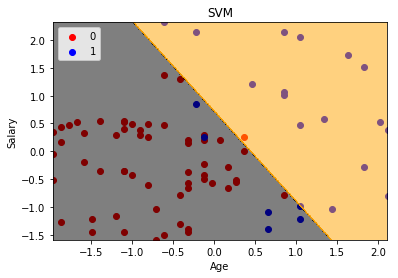

In [15]:
plt.scatter( Xtest [ytest == 0, 0], Xtest [ytest == 0, 1], c = ListedColormap(('r', 'b'))(0), label=0 )
plt.scatter( Xtest [ytest == 1, 0], Xtest [ytest == 1, 1], c = ListedColormap(('r', 'b'))(1), label=1 )

plt.contourf(X1,X2,z, alpha=0.5, cmap = ListedColormap(('k', 'orange')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

plt.title('SVM')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(loc='best')